In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from tensorflow.keras.models import load_model

### Data reading

In [142]:
file_list_0 = []
file_list_1 = []
for file in glob.glob("./histopathology_slides/histopathology_slides/0/*.png"):
    file_list_0.append(file)
for file in glob.glob("./histopathology_slides/histopathology_slides/1/*.png"):
    file_list_1.append(file)

In [144]:
len(file_list_0)

120

In [146]:
file_list_0[0]

'./histopathology_slides/histopathology_slides/0\\8863_idx5_x101_y1201_class0.png'

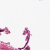

In [148]:
Image.open(file_list_0[0])

In [150]:
file_data_0 =[]
for file in file_list_0:
    img_frame = Image.open(file)
    np_frame = img_frame.getdata()
    file_data_0.append(np_frame)
file_data_0 = np.array(file_data_0)

file_data_1 =[]
for file in file_list_1:
    img_frame = Image.open(file)
    np_frame = img_frame.getdata()
    file_data_1.append(np_frame)
file_data_1 = np.array(file_data_1)
    

In [151]:
file_data_0.shape

(120, 2500, 3)

In [152]:
file_data_0[0]

array([[246, 246, 247],
       [246, 246, 247],
       [246, 246, 247],
       ...,
       [246, 245, 246],
       [246, 245, 246],
       [246, 245, 246]])

In [153]:
file_data_0 = file_data_0.reshape(120,50,50,3)
file_data_1 = file_data_1.reshape(120,50,50,3)

In [157]:
X = np.concatenate((file_data_0, file_data_1))

In [160]:
X=X/255

In [162]:
y = np.concatenate((np.zeros(120,dtype=np.int32),np.zeros(120,dtype=np.int32)+1))

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.85, shuffle = True)

In [166]:
X_train = tf.cast(X_train,tf.float32)
X_test = tf.cast(X_test,tf.float32)

In [168]:
type(y_train)

numpy.ndarray

In [170]:
X_train.shape

TensorShape([36, 50, 50, 3])

In [172]:
X_test.shape

TensorShape([204, 50, 50, 3])

In [174]:
np.unique(y_train)

array([0, 1])

In [176]:
y_train.shape

(36,)

In [178]:
 tf.experimental.numpy.experimental_enable_numpy_behavior()

In [23]:
y_train=tf.one_hot(y_train.astype(np.int32), depth=2)

### CNN architecture

In [25]:
tf.random.set_seed(0)
input_layer = Input(shape=(50,50,3),name = ('new_input_layer'))

x = layers.Conv2D(3,23,activation='relu')(input_layer)

x = layers.Conv2D(64,5, activation = "relu",name = 'conv_layer_1')(x)
x = layers.Conv2D(32,6, activation ="relu",name = 'conv_layer_2' )(x)
x = layers.Conv2D(16,8, activation ="relu",name= 'conv_layer_3')(x)

z = layers.Flatten()(x)
z = layers.Dense(10,activation = 'sigmoid')(z)
output_layer = Dense(2, activation = 'sigmoid')(z)

In [26]:
fresh_cnn = Model(inputs = input_layer, outputs = output_layer)

In [27]:
fresh_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ new_input_layer (InputLayer)    │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 3)      │         4,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 24, 24, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 19, 19, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 12, 12, 16)     │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,244 (543.92 KB)

 Trainable params: 139,244 (543.92 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
fresh_cnn.compile(optimizer = keras.optimizers.Adam(learning_rate =.00001),loss = 'binary_crossentropy')

In [29]:
history_fresh_cnn = fresh_cnn.fit(X_train, y_train.astype(np.int32), epochs = 50, batch_size =3, shuffle = True)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7013
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7008
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7006
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7003
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7000
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6997
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6993 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6989
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6984
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6978
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6971
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6961
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6950
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6941
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6935
Epoch 

In [30]:
y_pred_fresh = fresh_cnn.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [31]:
y_pred_rounded_fresh = np.argmax(y_pred_fresh, axis =1)

In [32]:
confusion_matrix(y_test, y_pred_rounded_fresh)

array([[88, 13],
       [ 9, 94]], dtype=int64)

In [33]:
fpr_fresh, tpr_fresh, thresolds_keras = roc_curve(y_test, y_pred_fresh[:,1])

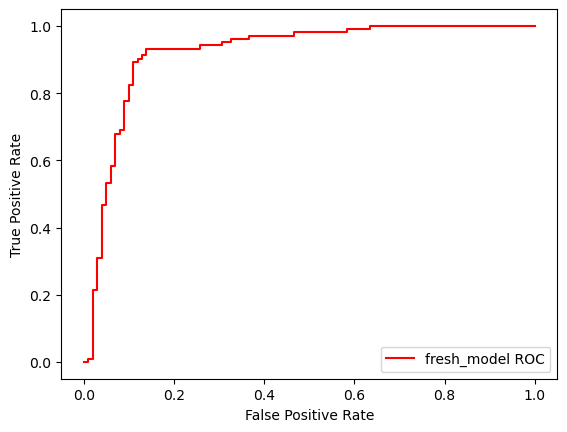

In [34]:
plt.plot(fpr_fresh,tpr_fresh,c='r',label='fresh_model ROC') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend()
plt.show() 

### Fine tuning pretrained model

In [36]:
cnn_mnist = load_model('./cnn_MNIST.keras',compile=False)

In [37]:
cnn_mnist.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 24, 24, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 19, 19, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 12, 12, 16)     │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,458 (525.23 KB)

 Trainable params: 134,458 (525.23 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
input_layer = layers.Input(shape=(50,50,3),dtype = tf.float32,name='new_input_layer')

x = layers.Conv2D(3,23,activation='relu')(input_layer)
z = cnn_mnist(x)

output_layer= layers.Dense(2, activation='sigmoid', name='output_layer')(z[0])

In [39]:
transfer_cnn = Model(inputs = input_layer, outputs = output_layer)

In [40]:
transfer_cnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ new_input_layer (InputLayer)    │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 3)      │         4,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 10)             │       134,458 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,244 (543.92 KB)

 Trainable params: 139,244 (543.92 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
transfer_cnn.compile(optimizer = keras.optimizers.Adam(learning_rate =.00001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [42]:
X_train = X_train.astype('float32')  # Normalize if needed
y_train = y_train.astype('float32')
history_transfer_cnn = transfer_cnn.fit(X_train, y_train , epochs=50 , batch_size=3, shuffle=True)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6182 - loss: 0.6989
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 0.6957
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 0.6958
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 0.6956
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 0.6952 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6182 - loss: 0.6951
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6182 - loss: 0.6949
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6182 - loss: 0.6948
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6182 - loss: 0.6947
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6182 - loss: 0.6946
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 0.6945
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.618

In [43]:
y_pred_transfer=transfer_cnn.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [44]:
y_pred_rounded_transfer=np.argmax(y_pred_transfer,axis=1)

In [45]:
confusion_matrix(y_test,y_pred_rounded_transfer)

array([[18, 83],
       [ 8, 95]], dtype=int64)

In [46]:
fpr_transfer, tpr_transfer, thresholds_keras = roc_curve(y_test, y_pred_transfer[:,1])

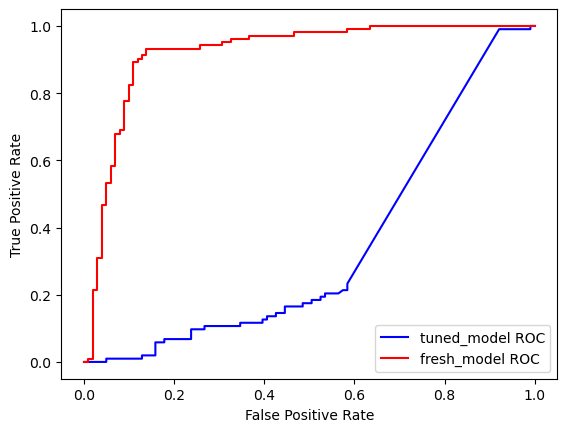

In [47]:
plt.plot(fpr_transfer, tpr_transfer, c='b', label='tuned_model ROC') 
plt.plot(fpr_fresh,tpr_fresh,c='r',label='fresh_model ROC') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend()
plt.show()  

### VGG16

In [49]:
from keras.applications.vgg16 import VGG16

In [50]:
vgg = VGG16(include_top = False,input_shape = (50,50,3))
flat1 = layers.Flatten()(vgg.layers[-1].output)
class1 = Dense(1024,activation ='relu')(flat1)
output_layer = Dense(2,activation ='softmax')(class1)

In [51]:
vgg_transfer = Model(inputs = vgg.input, outputs = output_layer)

In [53]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
vgg_transfer.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,242,050 (58.14 MB)

 Trainable params: 15,242,050 (58.14 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
y_pred_vgg_transfer_raw=vgg_transfer.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


In [56]:
y_pred_rounded_vgg_transfer_raw=np.argmax(y_pred_vgg_transfer_raw,axis=1)

In [57]:
confusion_matrix(y_test,y_pred_rounded_vgg_transfer_raw)

array([[101,   0],
       [103,   0]], dtype=int64)

In [58]:
fpr_vgg_transfer_raw, tpr_vgg_transfer_raw, thresholds_keras = roc_curve(y_test, y_pred_vgg_transfer_raw[:,1])

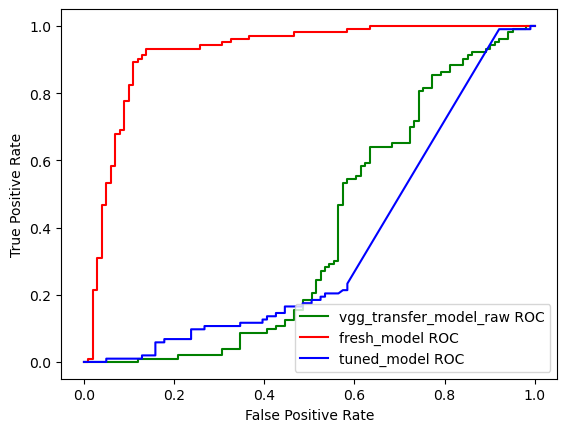

In [59]:
plt.plot(fpr_vgg_transfer_raw, tpr_vgg_transfer_raw,c='g',label='vgg_transfer_model_raw ROC') 
plt.plot(fpr_fresh,tpr_fresh,c='r',label='fresh_model ROC') 
plt.plot(fpr_transfer, tpr_transfer, c='b', label='tuned_model ROC') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend()
plt.show()  

In [60]:
# mark some layers as not trainable
vgg_transfer.get_layer('block1_conv1').trainable = False
vgg_transfer.get_layer('block1_conv2').trainable = False
vgg_transfer.get_layer('block2_conv1').trainable = False
vgg_transfer.get_layer('block2_conv2').trainable = False

In [61]:
vgg_transfer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy')

In [62]:
istory_transfer_cnn_tuned=vgg_transfer.fit(X_train, y_train, epochs=20, batch_size=3,
                shuffle=True)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - loss: 0.5296
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - loss: 1.2115
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - loss: 0.4919
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.3391
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - loss: 0.1517
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - loss: 0.1333
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - loss: 0.0236
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - loss: 0.0256
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - loss: 0.0017
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - loss: 5.5114e-04
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - loss: 1.9315e-04
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - loss: 1.1182e-04
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - loss: 7.7480e-05
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - loss: 5.8780e-05
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━

In [63]:
y_pred_vgg_transfer_tuned=vgg_transfer.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


In [64]:
y_pred_rounded_vgg_transfer_tuned=np.argmax(y_pred_vgg_transfer_tuned,axis=1)

In [65]:
confusion_matrix(y_test,y_pred_rounded_vgg_transfer_tuned)

array([[90, 11],
       [ 6, 97]], dtype=int64)

In [66]:
fpr_vgg_transfer_tuned, tpr_vgg_transfer_tuned, thresholds_keras = roc_curve(y_test, y_pred_vgg_transfer_tuned[:,1])

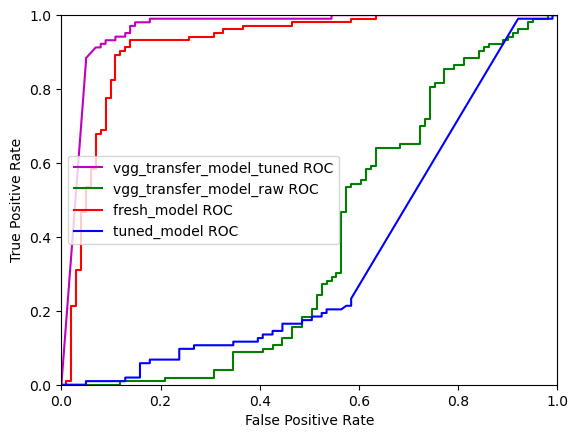

In [133]:
plt.plot(fpr_vgg_transfer_tuned, tpr_vgg_transfer_tuned,c='m',label='vgg_transfer_model_tuned ROC')
plt.plot(fpr_vgg_transfer_raw, tpr_vgg_transfer_raw,c='g',label='vgg_transfer_model_raw ROC')
plt.plot(fpr_fresh,tpr_fresh,c='r',label='fresh_model ROC') 
plt.plot(fpr_transfer, tpr_transfer, c='b', label='tuned_model ROC') 
plt.axis([0,1,0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend()
plt.show()  